**NOTEBOOK 3**

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>
In this exercise it was asked to produce Monte Carlo estimations for different types of European Options and compare them with the analytical results obtained from the Black-Scholes theory. The European Options are based on a contract stipulated between a seller and a buyer, namely the writer and the holder in this case: the writer guarantees to the holder the right to buy (this is the Call Option) or to sell (this is the Put Option) an asset at a fixed price K in a specific time T in the future. The profit the holder could have from the Call Options is given by $$max[0, S(t) - K] = (S(t) - K)^{+}$$ where $S(t)$ is the asset value at time t. On the other hand, for Put Options the following relation holds $$max[0, K - S(t)] = (K - S(t))^{+}.$$

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$. 
Given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$ where $W(t)\sim\mathcal{N}(0,t)$. Therefore, with these assumptions, the Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}.$$
The idea behind the Monte Carlo computation is to sample the mean value $$ \langle e^{-r T} (S(t) - K) \rangle$$ for Call Options and $$ \langle e^{-r T} (K - S(t) \rangle$$ for Put Options.
The computations were carried out with a direct sampling and a discretized sampling. 
Regarding the discretized sampling, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

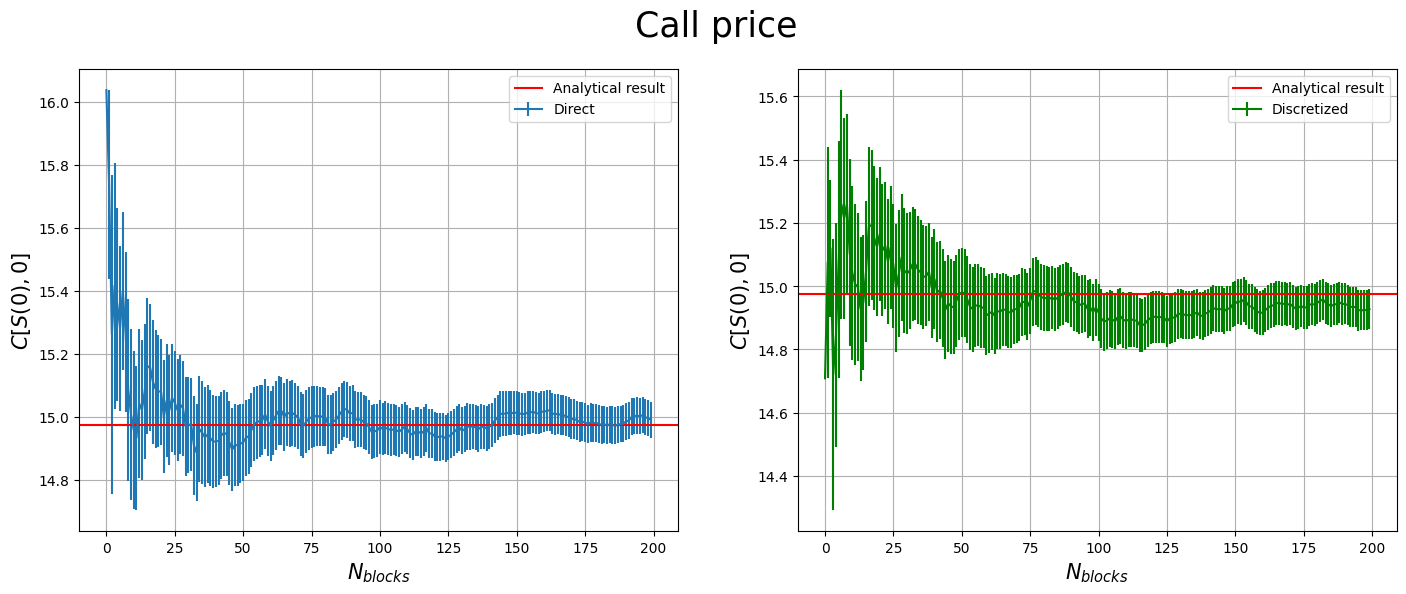

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

media_direct, varianza_direct = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_03/exercise_3/results_call_direct.dat", unpack =True, usecols=(0,1))
media_discr, varianza_discr = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_03/exercise_3/results_call_discretized.dat", unpack =True, usecols=(0,1))

M = 100000 #Number of throws
N = 200 #Number of blocks
L = (int)(M/N) #Number of throws per block
x = np.arange(N) 


fig=plt.figure(figsize=(17,6))
plt.suptitle("Call price", fontsize = 25)

plt.subplot(1,2,1)   
plt.errorbar(x,media_direct,yerr=varianza_direct, label="Direct")
plt.axhline(y = 14.975790778311286, color = 'r', linestyle = '-', label = "Analytical result")
plt.xlabel('$N_{blocks}$', fontsize=15)
plt.ylabel(r'$C[S(0),0]$', fontsize=15)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(x,media_discr,yerr=varianza_discr, label="Discretized", color = 'green')
plt.axhline(y = 14.975790778311286, color = 'r', linestyle = '-', label = "Analytical result")
plt.xlabel('$N_{blocks}$', fontsize=15)
plt.ylabel(r'$C[S(0),0]$', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()    

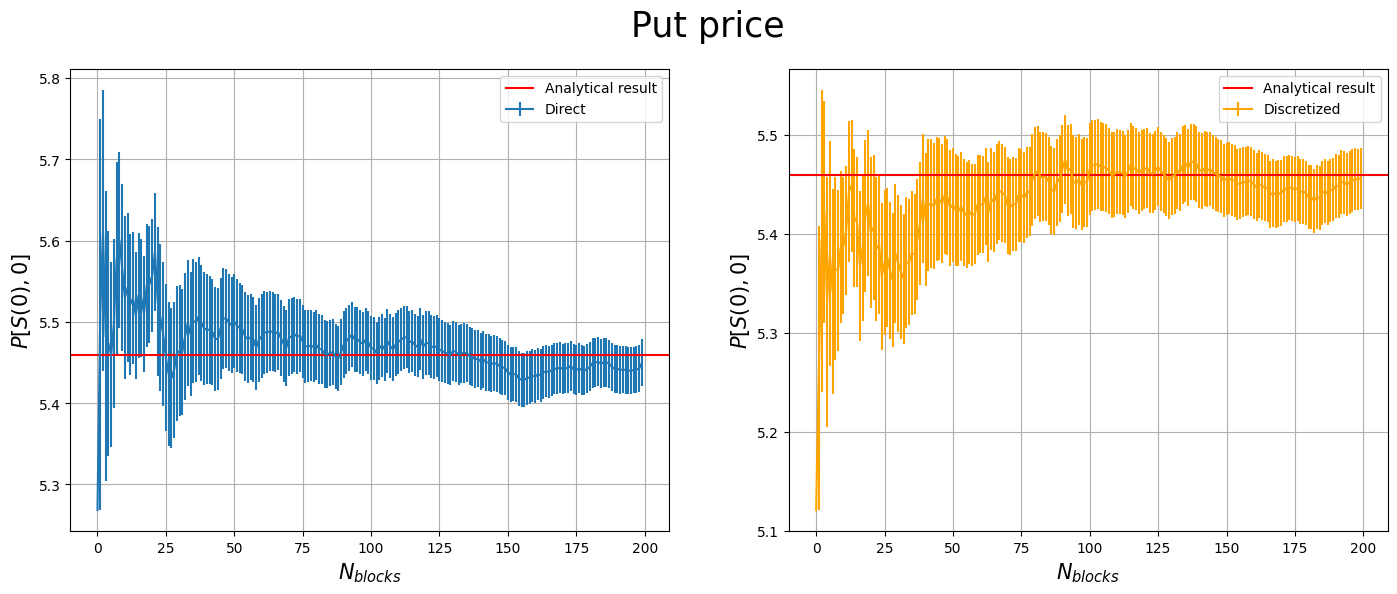

In [8]:
media_direct, varianza_direct = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_03/exercise_3/results_put_direct.dat", unpack =True, usecols=(0,1))
media_discr, varianza_discr = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_03/exercise_3/results_put_discretized.dat", unpack =True, usecols=(0,1))


fig=plt.figure(figsize=(17,6))
plt.suptitle("Put price", fontsize = 25)

plt.subplot(1,2,1)   
plt.errorbar(x,media_direct,yerr=varianza_direct, label="Direct")
plt.axhline(y = 5.4595325819072364, color = 'r', linestyle = '-', label = "Analytical result")
plt.xlabel('$N_{blocks}$', fontsize=15)
plt.ylabel(r'$P[S(0),0]$', fontsize=15)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(x,media_discr,yerr=varianza_discr, label="Discretized", color = 'orange')
plt.axhline(y = 5.4595325819072364, color = 'r', linestyle = '-', label = "Analytical result")
plt.xlabel('$N_{blocks}$', fontsize=15)
plt.ylabel(r'$P[S(0),0]$', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()    

For both the options and for both the sampling methods investigated, the plots show the convergence of the Monte Carlo computation towards the analytical result obtained from the Black-Scholes theory. 